In [2]:
#!/usr/bin/env python

# from: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/auto_examples/plot_object_detection_saved_model.html 

import time
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = "/home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/exported-models/my_model/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# load the label map
PATH_TO_LABELS = "/home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/annotations/label_map.pbtxt" 
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)



Loading model...Done! Took 9.909968614578247 seconds
Running inference for /home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/images/test/00178.jpg... Done
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0.39956573 0.22535822 0.16768247 0.16109878 0.13059759 0.11967409
 0.11565939 0.11112371 0.09675321 0.07496855 0.07344714 0.07095107
 0.06775457 0.04902247 0.0449059  0.04300797 0.04263023 0.04060319
 0.0404315  0.03995824 0.03830644 0.03770584 0.03582573 0.03527468
 0.03308526 0.03269377 0.03118545 0.02875897 0.02856797 0.02757022
 0.02753997 0.02741927 0.02622238 0.02540395 0.02519321 0.0250611
 0.02476975 0.02452087 0.0241605  0.02392858 0.02386335 0.02294713
 0.02286074 0.02262053 0.02223453 0.0213761  0.02114674 0.02099067
 0.02064621 0.02035263 0.02025938 0.02001876 0.01954231 0.0

In [6]:
import os

IMAGE_PATHS = []
rootdir = "/home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/images/test/"
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".jpg"):
            IMAGE_PATHS.append(filepath)

Running inference for /home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/images/test//00119.jpg... Done
Running inference for /home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/images/test//00143.jpg... Done
Running inference for /home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/images/test//00009.jpg... Done
Running inference for /home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/images/test//00092.jpg... Done
Running inference for /home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/images/test//00098.jpg... Done
Running inference for /home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/images/test//00059.jpg... Done
Running inference for /home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/works

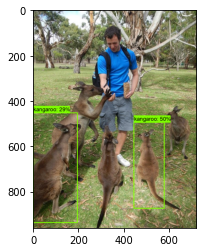

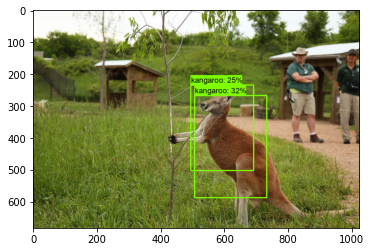

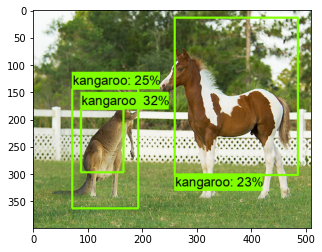

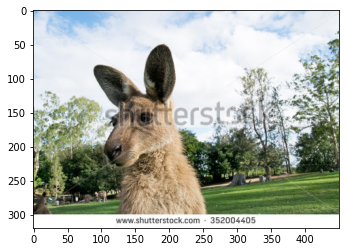

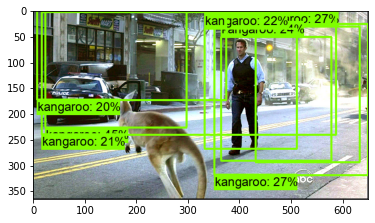

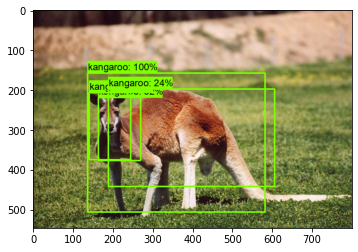

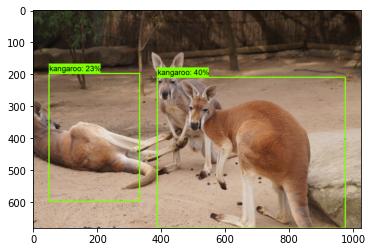

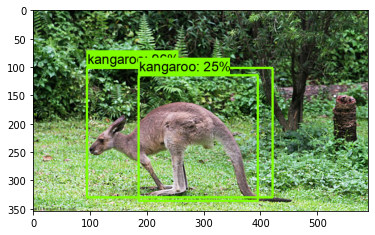

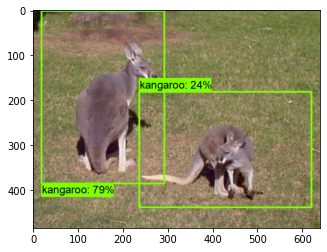

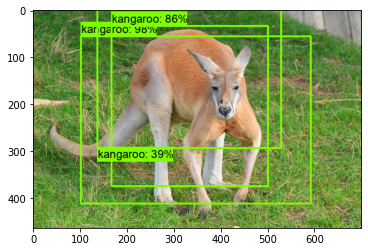

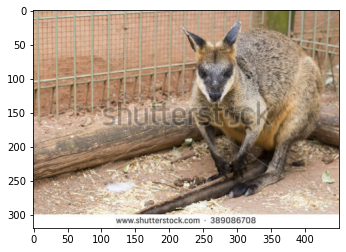

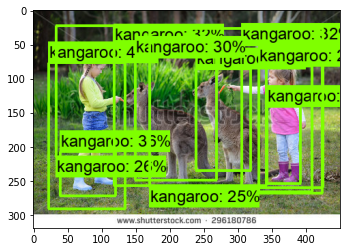

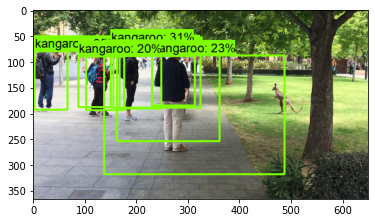

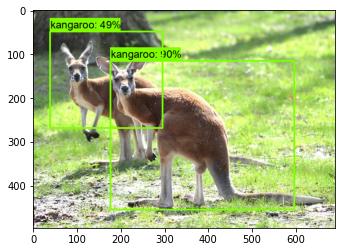

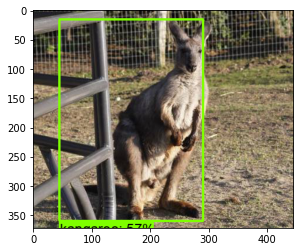

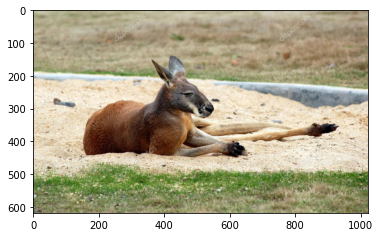

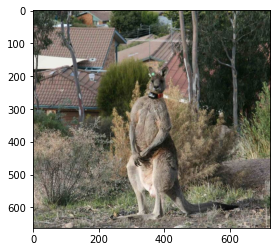

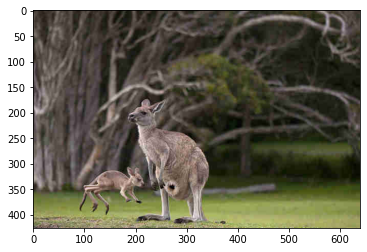

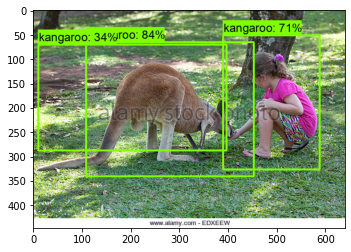

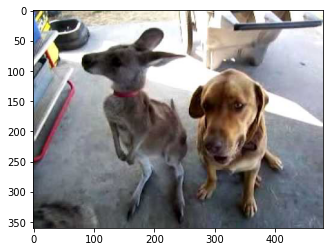

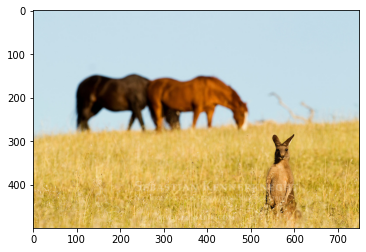

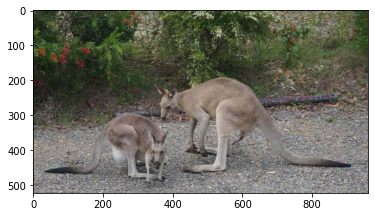

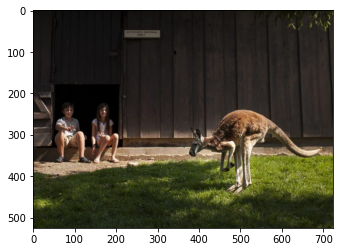

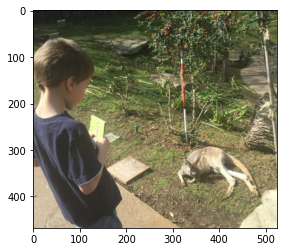

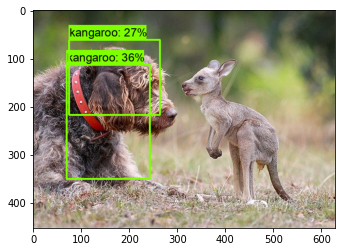

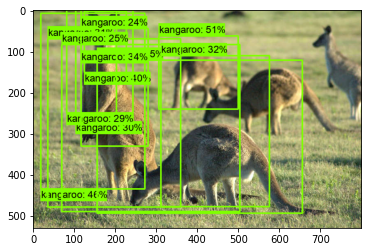

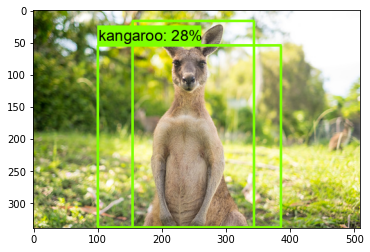

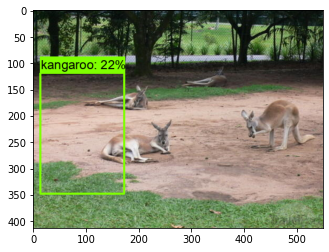

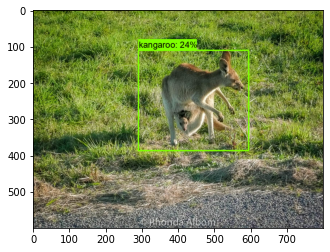

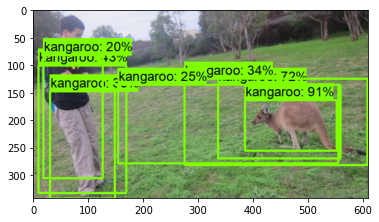

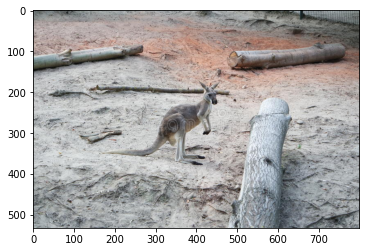

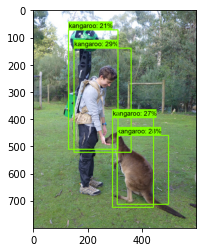

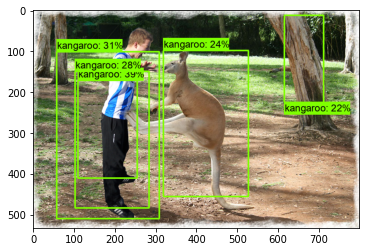

In [8]:
# run an image through the model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

%matplotlib inline

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

# place image here
#IMAGE_PATHS = ["/home/dpidave/training_resources/tf-object-detection-tutorial/Tensorflow/workspace/training_demo/images/test/00178.jpg"]
for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.20,
          agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    
plt.show()

# sphinx_gallery_thumbnail_number = 2